<a href="https://colab.research.google.com/github/Andrezac/FaculdadeImpacta/blob/main/Introducao_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de Dados para avaliar o melhor apartamento para um determinado perfil de cliente

In [3]:
import pandas as pd

In [6]:
aluguel= pd.read_excel('houses_rent.xlsx')

In [ ]:
aluguel.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


In [ ]:
aluguel.tail(10)

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
6070,6070,Barcelona,200,4,5,3,2,accept,not furnished,2600,4500,834,58,7992
6071,6071,Porto,600,5,5,4,-,accept,not furnished,3300,5000,916,76,9292
6072,6072,Barcelona,200,4,4,4,21,accept,furnished,2000,10000,862,127,12990
6073,6073,Barcelona,88,2,2,1,1,accept,not furnished,1200,6000,0,77,7277
6074,6074,Porto,28,1,1,0,-,not accept,furnished,0,1390,0,18,1408
6075,6075,Barcelona,50,2,1,1,2,accept,not furnished,420,1150,0,15,1585
6076,6076,Barcelona,84,2,2,1,16,not accept,furnished,768,2900,63,37,3768
6077,6077,Porto,48,1,1,0,13,accept,not furnished,250,950,42,13,1255
6078,6078,Barcelona,160,3,2,2,-,not accept,not furnished,0,3500,250,53,3803
6079,6079,Barcelona,60,2,1,1,4,accept,furnished,489,1900,0,25,2414


In [ ]:
aluguel = aluguel.rename(columns={"parking spaces":"parking_spaces", "rent amount":"rent_amount", "property tax":"property_tax", "fire insurance":"fire_insurance"})

In [ ]:
aluguel.head()


,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


In [ ]:
aluguel.dtypes

,0
index,int64
city,object
area,int64
rooms,int64
bathroom,int64
parking_spaces,int64
floor,object
animal,object
furniture,object
hoa,object


In [ ]:
aluguel = aluguel.astype({"rent_amount":"float", "property_tax":"float", "fire_insurance":"float", "total":"float"})
aluguel.dtypes

,0
index,int64
city,object
area,int64
rooms,int64
bathroom,int64
parking_spaces,int64
floor,object
animal,object
furniture,object
hoa,object


In [ ]:
aluguel.head(3)

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000.0,1000.0,121.0,9121.0
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000.0,1417.0,89.0,12680.0


In [ ]:
aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6080 non-null   int64  
 1   city            6080 non-null   object 
 2   area            6080 non-null   int64  
 3   rooms           6080 non-null   int64  
 4   bathroom        6080 non-null   int64  
 5   parking_spaces  6080 non-null   int64  
 6   floor           6080 non-null   object 
 7   animal          6080 non-null   object 
 8   furniture       6080 non-null   object 
 9   hoa             6080 non-null   object 
 10  rent_amount     6080 non-null   float64
 11  property_tax    6080 non-null   float64
 12  fire_insurance  6080 non-null   float64
 13  total           6080 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 665.1+ KB


In [ ]:
aluguel[['area', 'rooms', 'bathroom', 'parking_spaces', 'floor', 'rent_amount', 'property_tax', 'fire_insurance', 'total']].describe()

,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,151.143914,2.492599,2.341612,1.756250,4395.844408,490.533224,58.204276,6033.194572
std,375.559485,1.129665,1.438860,1.611909,3576.668946,6212.549484,49.313441,8751.347700
min,10.000000,1.000000,1.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,58.000000,2.000000,1.000000,1.000000,1800.000000,34.000000,23.000000,2451.500000
50%,100.000000,3.000000,2.000000,1.000000,3111.000000,145.000000,41.000000,4128.500000
75%,200.000000,3.000000,3.000000,2.000000,5952.500000,458.000000,77.000000,8074.000000
max,24606.000000,10.000000,10.000000,12.000000,45000.000000,366300.000000,677.000000,372700.000000


In [37]:
aluguel = aluguel[(aluguel['total']<=4000)]
aluguel.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
10,10,Porto,60,1,1,0,6,accept,not furnished,480,720,20,10,1230
11,11,Porto,64,1,2,1,4,accept,furnished,406,1550,0,7,1963
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950,11,13,1319
16,16,Porto,188,2,3,8,-,accept,not furnished,0,3010,584,46,3640


In [36]:
aluguel=aluguel[(aluguel['total']<=4000) & (aluguel['animal']=="accept")]
aluguel.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
10,10,Porto,60,1,1,0,6,accept,not furnished,480,720,20,10,1230
11,11,Porto,64,1,2,1,4,accept,furnished,406,1550,0,7,1963
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950,11,13,1319
16,16,Porto,188,2,3,8,-,accept,not furnished,0,3010,584,46,3640


In [38]:
aluguel = aluguel[(aluguel['total']<=4000) & (aluguel['animal']=="accept") & ((aluguel['rooms']==2) | (aluguel['rooms']==3))]
aluguel.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950,11,13,1319
16,16,Porto,188,2,3,8,-,accept,not furnished,0,3010,584,46,3640
28,28,Porto,150,3,2,2,13,accept,not furnished,1370,1800,250,23,3443
36,36,Porto,94,3,3,2,1,accept,not furnished,750,2200,192,28,3170


In [ ]:
aluguel.describe()

,index,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,3003.132907,100.432836,2.379531,1.653873,1.212509,1964.006397,95.678749,25.899787,2556.358209
std,1739.608911,340.999109,0.485443,0.745034,0.973862,692.152422,107.359160,11.078694,783.028975
min,1.000000,30.000000,2.000000,1.000000,0.000000,450.000000,0.000000,5.000000,843.000000
25%,1453.000000,60.000000,2.000000,1.000000,1.000000,1445.500000,1.500000,17.000000,1962.500000
50%,3001.000000,76.000000,2.000000,2.000000,1.000000,1900.000000,67.000000,25.000000,2507.000000
75%,4518.500000,100.000000,3.000000,2.000000,2.000000,2450.000000,144.000000,32.000000,3181.500000
max,6079.000000,12732.000000,3.000000,6.000000,8.000000,3915.000000,791.000000,59.000000,3998.000000


In [39]:
agrup_city_price = aluguel.groupby(['city'])['total'].agg('mean')
agrup_city_price

,total
city,
Porto,2161.947522


In [40]:
agrup_bath_room_price = aluguel.groupby(['bathroom', 'rooms'])['total'].agg('mean').reset_index()
agrup_bath_room_price

,bathroom,rooms,total
0,1,2,1569.271429
1,1,3,1924.371429
2,2,2,2439.424242
3,2,3,2645.884615
4,3,2,3165.400000
5,3,3,3123.950000
6,4,3,3419.666667


In [9]:

import seaborn as sns

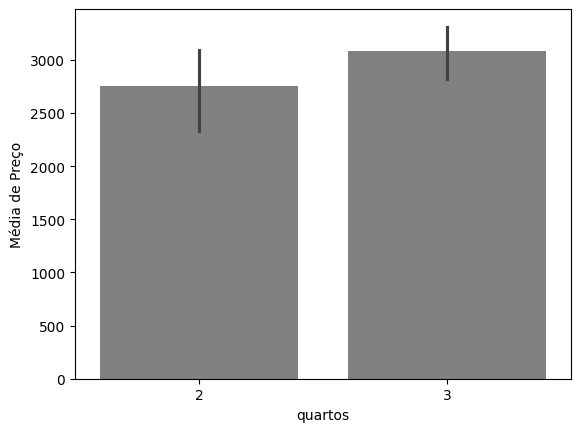

In [ ]:
ax= sns.barplot(data=agrup_bath_room_price, x='rooms', y='total', color='gray')
ax.set(xlabel='quartos', ylabel='Média de Preço');

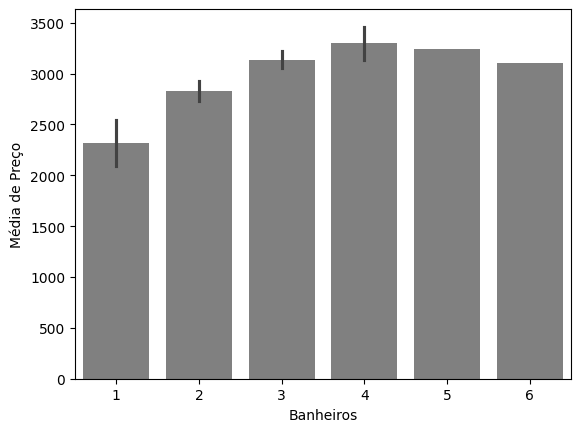

In [ ]:
ax= sns.barplot(data=agrup_bath_room_price, x='bathroom', y='total', color='gray')
ax.set(xlabel='Banheiros', ylabel='Média de Preço');

In [13]:
agrup_area = aluguel[['area']]

In [14]:
agrup_area = agrup_area.query('area<=100')
agrup_area.describe()

,area
count,3150.000000
mean,59.890476
std,21.750229
min,10.000000
25%,45.000000
50%,59.000000
75%,76.000000
max,100.000000


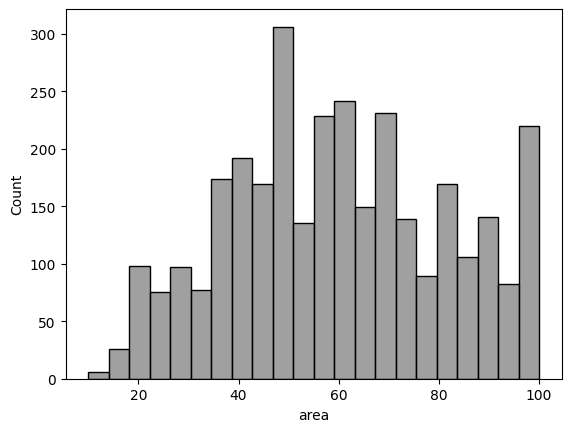

In [16]:
sns.histplot(data=agrup_area, x='area', color='gray');

In [22]:
agrup_city_price

,total
city,
Barcelona,6457.271099
Porto,3354.521059


In [26]:
aluguel = aluguel.query('total<=5000')

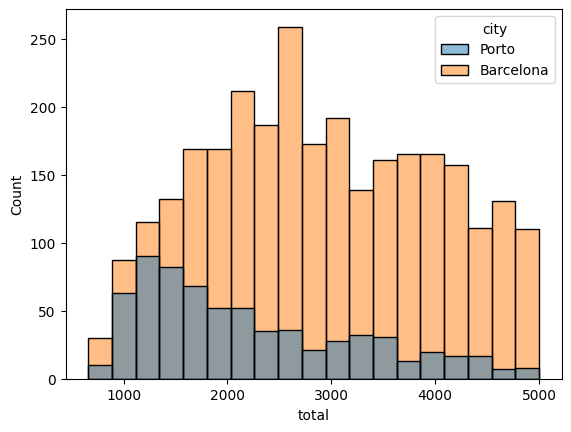

In [27]:
sns.histplot(data = aluguel, x='total', hue = 'city');

# **Escolhendo o Apartamento**

In [30]:
aluguel = aluguel.query("city == 'Porto'")
aluguel.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
10,10,Porto,60,1,1,0,6,accept,not furnished,480,720,20,10,1230
11,11,Porto,64,1,2,1,4,accept,furnished,406,1550,0,7,1963
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950,11,13,1319
16,16,Porto,188,2,3,8,-,accept,not furnished,0,3010,584,46,3640


In [31]:
aluguel.describe()

,index,area,rooms,bathroom,parking spaces,rent amount,property tax,fire insurance,total
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,3024.916422,108.076246,2.139296,1.558651,1.241935,1587.673021,93.454545,21.332845,2212.979472
std,1787.291153,488.017991,0.935329,0.837935,1.087292,875.758881,106.374847,12.825809,1036.219835
min,1.000000,20.000000,1.000000,1.000000,0.000000,420.000000,0.000000,3.000000,736.000000
25%,1438.750000,53.000000,1.000000,1.000000,1.000000,900.000000,25.000000,12.000000,1357.750000
50%,3068.000000,70.000000,2.000000,1.000000,1.000000,1300.000000,67.000000,17.000000,1927.500000
75%,4551.500000,100.000000,3.000000,2.000000,2.000000,2000.000000,119.750000,27.000000,2958.750000
max,6077.000000,12732.000000,6.000000,6.000000,8.000000,4300.000000,1056.000000,65.000000,4998.000000


In [32]:
aluguel.groupby('floor').index.nunique().sort_values(ascending=False)

,index
floor,
-,134
3,81
1,81
2,64
4,56
7,43
5,40
6,34
8,25


In [33]:
agrup_floor_price = aluguel.groupby('floor')['total'].agg('mean').reset_index()
agrup_floor_price

,floor,total
0,1,2103.765432
1,2,1847.406250
2,3,1723.592593
3,4,1774.625000
4,5,2311.100000
5,6,2460.352941
6,7,2460.953488
7,8,2347.360000
8,9,2486.600000
9,10,1925.000000


<Axes: xlabel='floor', ylabel='total'>

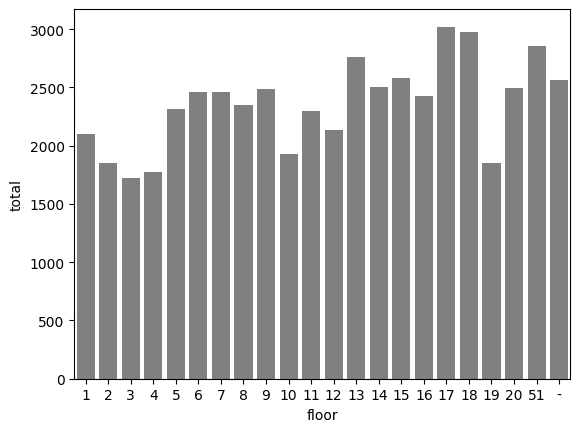

In [34]:
sns.barplot(data = agrup_floor_price, x ='floor', y ='total', color ='gray')

In [41]:
sixteenth_floor = aluguel.query("floor == 16")
sixteenth_floor.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
1843,1843,Porto,100,2,1,0,16,accept,not furnished,550,900,61,12,1523
5175,5175,Porto,72,2,1,2,16,accept,not furnished,730,1200,89,16,2035
